In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset and prepare the model (just for the sake of context)
companies = pd.read_csv(r'D:\kailas\ML\1000_Companies.csv')

# Prepare the features (X) and the target (y)
x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()








,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:

# Label Encoding for the State column



labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

# One Hot Encoding for State column (for multicollinearity removal)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform(x)




In [60]:
print(x[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [61]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [62]:
# Train the linear regression model
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [63]:
# Function to get user input and make predictions
def predict_profit():
    # Get user input
    r_and_d_spend = float(input("Enter R&D Spend: "))
    administration = float(input("Enter Administration: "))
    marketing_spend = float(input("Enter Marketing Spend: "))
    state = input("Enter State (New York, California, Florida): ")

    # Encode the state input
    state_encoded = labelencoder.transform([state])[0]

    # Prepare the input for prediction (state needs to be one-hot encoded)
    state_one_hot = np.zeros(len(labelencoder.classes_))
    state_one_hot[state_encoded] = 1

    # Combine the inputs into a single feature array
    user_input = np.array([r_and_d_spend, administration, marketing_spend])
    user_input = np.concatenate([state_one_hot, user_input])

    # Predict the profit using the trained model
    predicted_profit = regressor.predict([user_input])

    # Output the result
    print(f"The predicted profit for the given inputs is: {predicted_profit[0]:.2f}")

# Call the function to test it
predict_profit()

The predicted profit for the given inputs is: 200255.35


In [53]:
# Directly calculate R² score using the score method
accuracy = regressor.score(x_test, y_test)
print(f"Accuracy (R² Score): {accuracy:.4f}")


Accuracy (R² Score): 0.9293


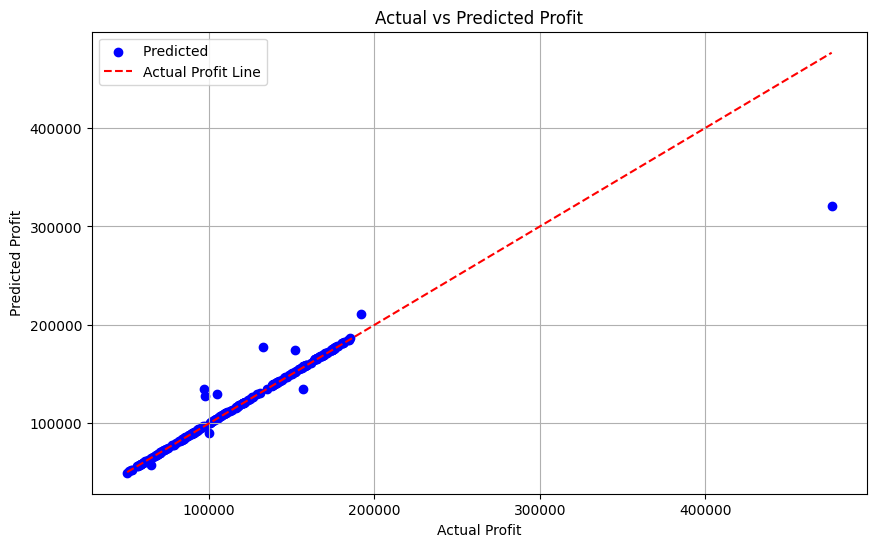

'\nThe First List ([min(y_test), max(y_test)]):\nThis represents the x-axis values (Actual profits).\nThe line needs to span from the minimum actual profit to the maximum actual profit.\n\nThe Second List ([min(y_test), max(y_test)]):\nThis represents the y-axis values (Predicted profits).\nFor a perfect model, predicted profits should be the same as actual profits, so the y-values will match the x-values at each point.\n\n'

In [54]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = regressor.predict(x_test)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted ')

# Add the actual profit line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Profit Line')

# Add title and labels
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


"""
The First List ([min(y_test), max(y_test)]):
This represents the x-axis values (Actual profits).
The line needs to span from the minimum actual profit to the maximum actual profit.

The Second List ([min(y_test), max(y_test)]):
This represents the y-axis values (Predicted profits).
For a perfect model, predicted profits should be the same as actual profits, so the y-values will match the x-values at each point.

"""
